In [9]:
import pandas as pd
import numpy as np

### Load Files & Create DF

In [10]:
brands_file = 'data/brand_lines.xlsx'
market_system_file = 'data/market_system.xlsx'
market_trip_file = 'data/market_trip.xlsx'
raw_data_file = 'data/raw_data.xlsx'
brands_df = pd.read_excel(brands_file)
market_system_df = pd.read_excel(market_system_file)
market_trip_df = pd.read_excel(market_trip_file)
raw_data_df = pd.read_excel(raw_data_file)

# Brands

### Remove Unnamed Columns

In [11]:
for col in brands_df.columns:
    if 'Unnamed' in col:
        del brands_df[col]

### Melt Columns

In [12]:
brands_df = pd.melt(brands_df)
brands_group = brands_df.groupby(['variable', 'value']).count().reset_index()

In [13]:
brands_group = brands_group[brands_group['value'] != 'Total Lines']

In [14]:
brands_group.head()

,variable,value
0,58 Degrees & Holding,Big Stump Brew Co Lions Crown
1,58 Degrees & Holding,Big Stump Brewing Rowan's Red Ale
2,58 Degrees & Holding,Matua Sauvignon Blanc
3,58 Degrees & Holding,Powder Keg Cabernet Sauvignon
5,58 Degrees & Holding,Two Rivers Ginger Cider


# Market System Builder

In [15]:
market_system_df.head()

,distributor,serviceable,distactive,locid,city,address1,zip,tapname,bid,zonevalue,area,did,client,clientNumber,recurDescription,quantity
0,ALTAMONT BEER WORKS,True,True,1065193,Antioch,1 Marina Plz,94509,Altamont Beer Works Maui Waui,1054244,CA07,NaN,157,Smiths Landing Seafood Grill (Antioch/Marina),NaN,NaN,1
1,ALTAMONT BEER WORKS,True,True,1026931,Antioch,5019 Lone Tree Way,94531,Altamont Beer Works Hella Hoppy,3520,CA07,NaN,157,HD Burgers & More (Antioch/Lone Tree),NaN,NaN,1
2,ALTAMONT BEER WORKS,True,True,1026931,Antioch,5019 Lone Tree Way,94531,Altamont Beer Works Maui Waui,1054244,CA07,NaN,157,HD Burgers & More (Antioch/Lone Tree),NaN,NaN,1
3,ALTAMONT BEER WORKS,True,True,1249,Aptos,8059 Aptos St,95003,Altamont Beer Juice Above The Clouds,1195213,CA12,NaN,157,2M - Aptos St BBQ (Aptos/Aptos),NaN,NaN,1
4,ALTAMONT BEER WORKS,True,True,1249,Aptos,8059 Aptos St,95003,Altamont Beer Work Nu-Clear IPA,1197089,CA12,NaN,157,2M - Aptos St BBQ (Aptos/Aptos),NaN,NaN,1


### Check if Tap is Associated with Distributor

* Throw flag if the tap is not associated with distributor in Brand Lines by Dist Report
* If tap is not associated with distributor, check if the brewery is associated with distributor

In [16]:


            
for index, row in market_system_df.iterrows():
    dist = row['distributor']
    
    market_system_audit = market_system_df[market_system_df['distributor'] == dist]
    brand_audit = brands_group[brands_group['variable'] == dist]
    brewery_audit = raw_data_df[raw_data_df['Distributor'] == dist]

    tap = row['tapname']
    brand_taps = brand_audit['value'].unique()
    breweries = brewery_audit['BreweryName'].unique()
    brewery_names = []
    
    for brewery in breweries:
        if not isinstance(brewery, float):
            name = brewery.split()
        
            if name[0].length() > 3
                brewery_names.append(name[0])

    if tap not in brand_taps:
        market_system_df.loc[index, 'dist_tap_audit'] = 'x'
        
        if any(x in tap for x in brewery_names):
            market_system_df.loc[index, 'brewery_dist_audit'] = 'x'

    
        

SyntaxError: invalid syntax (<ipython-input-16-474ef959efad>, line 17)

In [86]:
brewery_names

['Camelot', 'Line', 'Angeline', 'Craft', 'A', 'Girls']

In [87]:
brand_taps

array(['A To Z Wineworks Pinot Noir', 'A to Z Wineworks Pinot Gris',
       'Angeline Pinot Noir', 'Angeline Sauvignon Blanc', 'Angeline Wine',
       'Angeline Wine Pinot Noir', 'Artezin Zinfandel', 'Bonterra Rose',
       'Bonterra Sauvignon Blanc', 'Bushido Sake',
       'Camelot Cabernet Sauvignon', 'Camelot Chardonnay',
       'Camelot Merlot', 'Camelot Pinot Grigio', 'Chardonnay',
       'Day Owl Wines', 'Folie A Deux Merlot',
       'Freakshow Cabernet Sauvignon', 'Line 39 Cabernet Sauvignon',
       'Line 39 Chardonnay', 'Line 39 Pinot', 'Line 39 Pinot Noir',
       'Line 39 Sauvignon Blanc', 'Martin Ray Rose',
       'Michael David Cabernet Freakshow', 'OZV Old Vine Red Blend',
       'Ozv Rose', 'Ryder Estate Central Coast Chardonnay',
       'Ryder Estate Central Coast Pinot Noir Rose', 'Simple Life Winery',
       'Sonoma Cutrer Chardonnay', 'St. Francis Wine',
       'St. Francis Zinfandel', 'The Girls In The Vaneyard',
       'Tinto Rey Rose'], dtype=object)

In [88]:
market_system_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16623 entries, 0 to 16622
Data columns (total 18 columns):
distributor           16623 non-null object
serviceable           16623 non-null bool
distactive            16623 non-null bool
locid                 16623 non-null int64
city                  16623 non-null object
address1              16623 non-null object
zip                   16623 non-null int64
tapname               16623 non-null object
bid                   16623 non-null int64
zonevalue             16623 non-null object
area                  0 non-null float64
did                   16623 non-null int64
client                16623 non-null object
clientNumber          5135 non-null float64
recurDescription      10311 non-null object
quantity              16623 non-null int64
dist_tap_audit        482 non-null object
brewery_dist_audit    353 non-null object
dtypes: bool(2), float64(2), int64(5), object(9)
memory usage: 2.1+ MB


In [42]:
tap

'Firestone Helluva Brulee'

In [43]:
brand_taps

array(['21 St Amendment', '21 St Amendment Brewery Fireside Chat',
       '21St Amendment', '21St Amendment Blonde Orange IPA',
       '21St Amendment Blood Orange Brew Free',
       '21St Amendment Blood Orange IPA',
       '21St Amendment Brew Free Or Die',
       '21St Amendment Brew Free Or Die Blood Orange',
       '21st Amendment Back In Black IPA', '21st Amendment Blood Orange',
       '21st Amendment Brew Free or Die IPA',
       '21st Amendment Down to Earth', '21st Amendment El Sully Lager',
       '21st Amendment Hell or High Watermelon',
       '21st Amendment Hell or High Watermelon Wheat',
       '21st Amendment IPA', '21st Amendment Tasty IPA',
       '21st Amendment Toaster Pastry', 'Ace Apple Cider',
       'Ace California Cider', 'Ace Cider', 'Ace Guava Cider',
       'Ace Pear Cider', 'Ace Perry Cider', 'Ace Pineapple',
       'Ace Pineapple Cider', 'Ace Seasonal Cider',
       'Alaskan Brewing Alaskan Amber', 'Alaskan Brewing Amber',
       'Alpine Beer Duet', 'Alpi

In [89]:
market_system_df.head()

,distributor,serviceable,distactive,locid,city,address1,zip,tapname,bid,zonevalue,area,did,client,clientNumber,recurDescription,quantity,dist_tap_audit,brewery_dist_audit
0,ALTAMONT BEER WORKS,True,True,1065193,Antioch,1 Marina Plz,94509,Altamont Beer Works Maui Waui,1054244,CA07,NaN,157,Smiths Landing Seafood Grill (Antioch/Marina),NaN,NaN,1,NaN,NaN
1,ALTAMONT BEER WORKS,True,True,1026931,Antioch,5019 Lone Tree Way,94531,Altamont Beer Works Hella Hoppy,3520,CA07,NaN,157,HD Burgers & More (Antioch/Lone Tree),NaN,NaN,1,NaN,NaN
2,ALTAMONT BEER WORKS,True,True,1026931,Antioch,5019 Lone Tree Way,94531,Altamont Beer Works Maui Waui,1054244,CA07,NaN,157,HD Burgers & More (Antioch/Lone Tree),NaN,NaN,1,NaN,NaN
3,ALTAMONT BEER WORKS,True,True,1249,Aptos,8059 Aptos St,95003,Altamont Beer Juice Above The Clouds,1195213,CA12,NaN,157,2M - Aptos St BBQ (Aptos/Aptos),NaN,NaN,1,NaN,NaN
4,ALTAMONT BEER WORKS,True,True,1249,Aptos,8059 Aptos St,95003,Altamont Beer Work Nu-Clear IPA,1197089,CA12,NaN,157,2M - Aptos St BBQ (Aptos/Aptos),NaN,NaN,1,NaN,NaN


In [182]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [183]:
plt.rcParams['figure.figsize'] = (20,10)

In [184]:
df_poly = gpd.read_file('data/ca04.geojson')

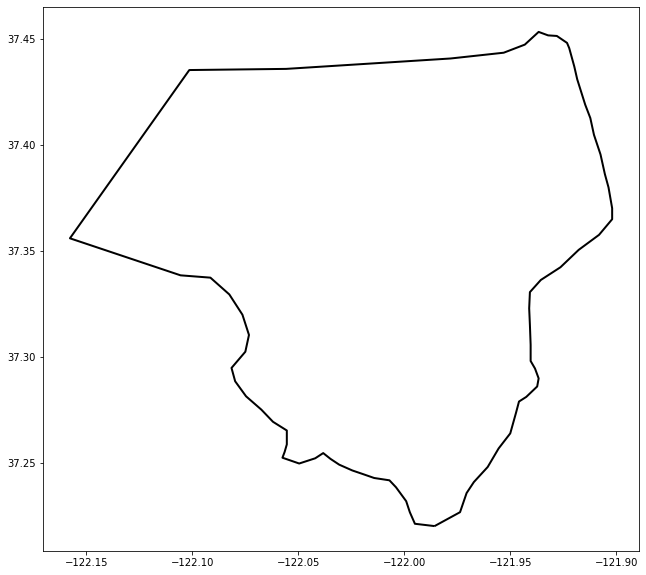

In [185]:
ax = df_poly.plot(color='None', edgecolor = 'k', linewidth = 2)
ax

In [199]:
locations = pd.read_excel('data/BAY_Send_Orders.xlsx')

In [200]:
def merge(list1, list2): 
      
    merged_list = [(p1, p2) for idx1, p1 in enumerate(list1)  
    for idx2, p2 in enumerate(list2) if idx1 == idx2] 
    return merged_list 

latitudes = locations[' Latitude'].to_list()
longitudes = locations[' Longitude'].to_list()

zipped = merge(latitudes, longitudes)


In [201]:
zipped

[(37.74303, -122.426666),
 (35.5961, -120.694),
 (35.48922, -120.66966),
 (35.49058, -120.66987),
 (36.929042, -121.548087),
 (35.178476, -120.732096),
 (36.973822, -121.969731),
 (35.12318, -120.57868),
 (37.324461, -122.013914),
 (37.324461, -122.013914),
 (37.371049, -121.918786),
 (37.59896, -122.00682),
 (37.29271, -121.99015),
 (37.352683, -121.924751),
 (37.352683, -121.924751),
 (37.3332, -121.91413),
 (37.3332, -121.91413),
 (37.33504, -121.88975),
 (36.97675, -121.90054),
 (37.376671, -122.030013),
 (37.376671, -122.030013),
 (37.3226, -121.94752),
 (37.3226, -121.94752),
 (37.43822, -122.15999),
 (36.970927, -122.024172),
 (37.3226, -121.94752),
 (37.376885, -122.030566),
 (37.3226, -121.94752),
 (37.376885, -122.030566),
 (37.336979, -121.888985),
 (37.336979, -121.888985),
 (37.974299, -122.057588),
 (37.97256, -122.05958),
 (36.537913, -121.909065),
 (36.97448, -122.02641),
 (37.3226, -121.94752),
 (37.3226, -121.94752),
 (37.29351, -121.91296),
 (36.26082, -121.79318),
 

In [202]:
locations['Geolocation'] = zipped

In [203]:
locations['geometry'] = locations.Geolocation.apply(lambda x: Point(x))

In [204]:
locations.columns

Index(['Route - ID', ' Order Number', ' Driver 1 - ID',
       ' Driver 1 - First Name', ' Driver 1 - Last Name',
       ' Service Location - ID', ' Service Location - Description',
       ' Service Location - Address Line 1', ' Service Location - City',
       ' Service Location - Postal Code', ' Service Location - State',
       ' Service Location - Contact - First Name',
       ' Service Location - County', ' Latitude', ' Longitude',
       ' Session Date', ' Begin Date', ' Taken By',
       ' Pickup Quantities - Taps', ' Pickup Quantities - J&L Taps',
       ' Stop - Arrival Time', ' Stop - Departure Time',
       ' Special Instructions', ' Pickup Quantities - WWH Taps', 'Geolocation',
       'geometry'],
      dtype='object')

In [205]:
ca04 = locations[locations[' Service Location - Contact - First Name'] == 'CA04']  
ca01 = locations[locations[' Service Location - Contact - First Name'] == 'CA01']

In [206]:
ca04 = ca04[[' Service Location - Description', 'Geolocation', 'geometry', ' Latitude', ' Longitude']]
ca01 = ca01[[' Service Location - Description', 'Geolocation', 'geometry', ' Latitude', ' Longitude']]

In [194]:



# ca01.plot(ax=ax)

# for index, row in ca04_ca01.iterrows():
    
#     plt.annotate(row[' Service Location - Description'], (row[' Latitude'], row[' Longitude']))

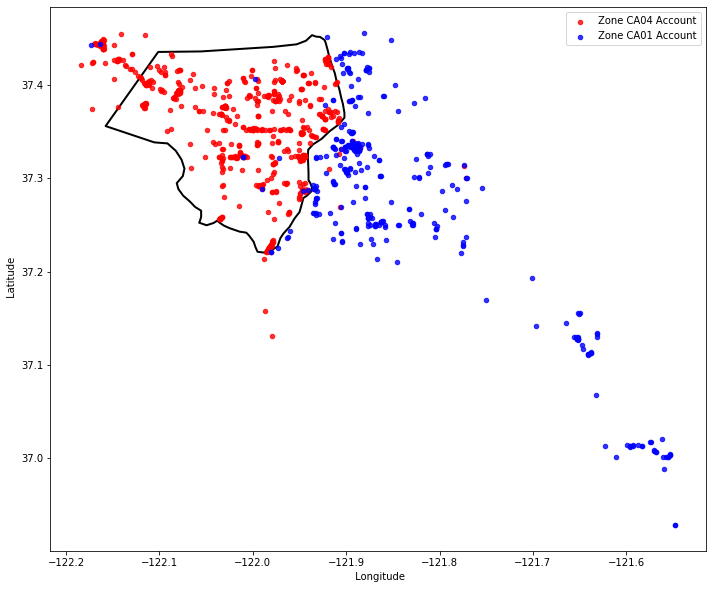

In [208]:
ax1 = df_poly.plot(color='None', edgecolor = 'k', linewidth = 2, label="Zone CA04 Shape")
ax2 = ca04.plot(kind='scatter', x=' Longitude', y = ' Latitude', color = 'r', ax=ax1, label="Zone CA04 Account", alpha = 0.8)
ax3 = ca01.plot(kind='scatter', x=' Longitude', y = ' Latitude', color = 'b', ax=ax1, label ="Zone CA01 Account", alpha = 0.8)